# Qunatum optimal control example

This is an example code for qunatum optimal control. you can choose any Hamiltonian you want but with only one control parameter. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from qoct import QH, QOCT
%matplotlib inline

Start with some initial conditions of Hamiltonian matrix and an initial control parameter.

In [50]:
H0 = [[1,0],[0,-1]]
Hctr = [[0,1],[1,0]]
ctrl_i = .1*np.ones(1000)
phi_i = [[0],[1]]

Call QH module to build up equation of motion and states.

In [51]:
qh_test = QH(H0, Hctr, ctrl_i, phi_i)
time = qh_test.real_tim
phi = qh_test.phi_t()

Here we can show our first figure of probability variation in time.

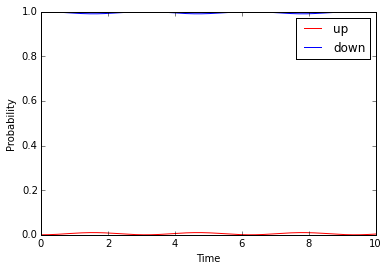

In [52]:
prob = qh_test.prob_t(phi)
plt.plot(time, prob[:,0,:],'r',label = 'up')
plt.plot(time, prob[:,1,:],'b',label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

You can find the probability will stay at original state since I choose eigenstate to begin, and with a small variation cause by ctrl_i. 

Given the goal state we want and previous qh_test class into QOCT module to calculate optimal control pulse.

IterTime: 1,   Error: [[ 0.94177277]],   TotTime: 1.823038,   AvgTime: 1.823043
IterTime: 2,   Error: [[ 0.80324413]],   TotTime: 3.377117,   AvgTime: 1.6885605
IterTime: 3,   Error: [[ 0.57252269]],   TotTime: 4.945052,   AvgTime: 1.648352
IterTime: 4,   Error: [[ 0.38688997]],   TotTime: 6.523091,   AvgTime: 1.630774
IterTime: 5,   Error: [[ 0.25110548]],   TotTime: 8.134397,   AvgTime: 1.6268802
IterTime: 6,   Error: [[ 0.15851196]],   TotTime: 9.707629,   AvgTime: 1.617939
IterTime: 7,   Error: [[ 0.09832188]],   TotTime: 11.296942,   AvgTime: 1.61384957143
IterTime: 8,   Error: [[ 0.06038097]],   TotTime: 12.856195,   AvgTime: 1.607024875
IterTime: 9,   Error: [[ 0.03690944]],   TotTime: 14.451252,   AvgTime: 1.60569511111
IterTime: 10,   Error: [[ 0.02254411]],   TotTime: 16.034717,   AvgTime: 1.6034721
IterTime: 11,   Error: [[ 0.01379956]],   TotTime: 17.707198,   AvgTime: 1.60974572727
IterTime: 12,   Error: [[ 0.00848621]],   TotTime: 19.304125,   AvgTime: 1.60867758333
IterT

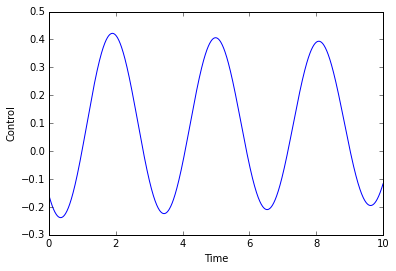

In [53]:
phi_g = [[1],[0]]
qoct_test = QOCT(qh_test, phi_g)
ctrl_test = qoct_test.run()
plt.plot(time[:-1], ctrl_test)
plt.xlabel('Time')
plt.ylabel('Control')
plt.show()

and probability variation in time.

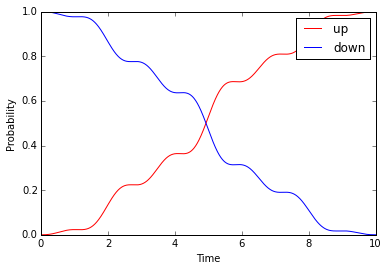

In [54]:
phi_new = qh_test.phi_t()
prob_new = qh_test.prob_t(phi_new)

plt.plot(time, prob_new[:,0,:],'r',label = 'up')
plt.plot(time, prob_new[:,1,:],'b', label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

Following we consider a long time variation of probability and control comes in the middle time.

In [55]:
lon = np.size(ctrl_test)
ctrl_lon = np.zeros(3*lon)
ctrl_lon[lon:2*lon ] = ctrl_test[:]

One can plot the probability variation again.

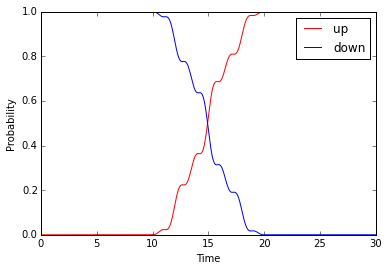

In [56]:
qh_test2 = QH(H0, Hctr, ctrl_lon, phi_i)
time2 = qh_test2.real_tim
phi2 = qh_test2.phi_t()

prob2 = qh_test2.prob_t(phi2)
plt.plot(time2, prob2[:,0,:],'r',label = 'up')
plt.plot(time2, prob2[:,1,:],'b', label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

The end.